In [77]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
from data import *

In [2]:
df = pd.read_csv('data/beijing_201802_201803_aq.csv')
df['utc_time'] = pd.to_datetime(df['utc_time'])

In [20]:
stations = list(df.groupby(by='stationId').size().index)

In [26]:
stations[0]

'aotizhongxin_aq'

In [ ]:
pm25_df = df[df['stationId'] == stations[0]][['utc_time', 'PM2.5']]
pm25_df.columns = ['ds', 'y']
pm25_df = pm25_df.dropna()
pm25_df

/anaconda3/envs/python36/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


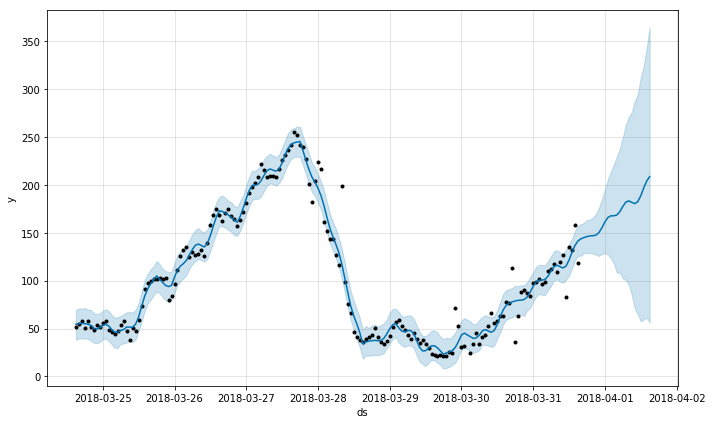

In [85]:
# pm25_df['cap'] = 500 # uncomment if growth='logistic'
m = Prophet(#growth='logistic', # default: linear
            yearly_seasonality=False, weekly_seasonality=False, daily_seasonality='auto',
            #seasonality_prior_scale=0.1, # no use if all seasonality set to False
            changepoint_prior_scale=10) # important argument! Try changing it and then have a look at the figure
m.fit(pm25_df[-24*7:])
future = m.make_future_dataframe(periods=24, freq='H')
# future['cap'] = 500 # uncomment if growth='logistic'
forecast = m.predict(future)
m.plot(forecast)
res_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [86]:
res_df.tail(24)

,ds,yhat,yhat_lower,yhat_upper
168,2018-03-31 16:00:00,143.751287,126.069450,158.958145
169,2018-03-31 17:00:00,145.033312,128.999997,160.342374
170,2018-03-31 18:00:00,146.070524,128.988827,163.450627
171,2018-03-31 19:00:00,146.720994,128.674646,163.677325
172,2018-03-31 20:00:00,146.912972,128.064615,165.971041
173,2018-03-31 21:00:00,147.561078,127.214465,169.509388
174,2018-03-31 22:00:00,150.136643,125.710330,175.980946
175,2018-03-31 23:00:00,155.160478,127.926195,185.092187
176,2018-04-01 00:00:00,161.239351,128.837628,195.280312
177,2018-04-01 01:00:00,165.909015,127.035967,205.640291


In [87]:
actual = airQualityData(year=2018, month=3, day=31, hour=17)
actual[actual['station_id'] == stations[0]]

,id,station_id,time,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration
4,2941998,aotizhongxin_aq,2018-03-31 17:00:00,134.0,218.0,158.0,1.4,2.0,11.0
